In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

In [3]:
full_image=cv2.imread('puppy.jpg')
part = cv2.imread('part.jpg')
full_image=cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)
part=cv2.cvtColor(part, cv2.COLOR_BGR2RGB)

(2003, 2003, 3)


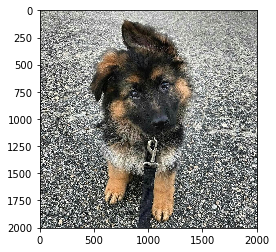

In [4]:
# our target image
print(full_image.shape)
plt.imshow(full_image)

(1123, 995, 3)


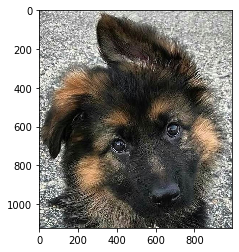

In [5]:
# the image we want to identify
print(part.shape)
plt.imshow(part)

In [6]:
# Eval just converts the string to method.
# Example
arr = [1,2,3]
x = "sum"
myfunc = eval(x)

print(myfunc(arr))

6


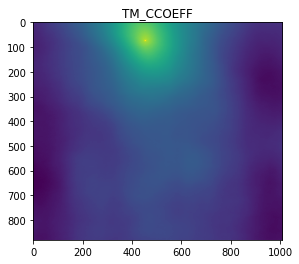

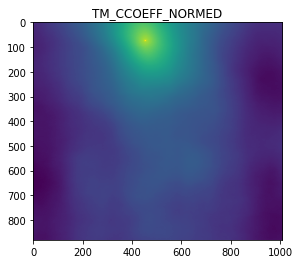

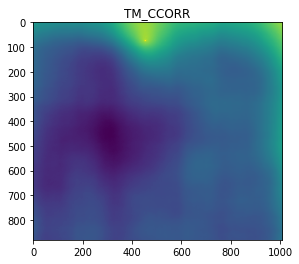

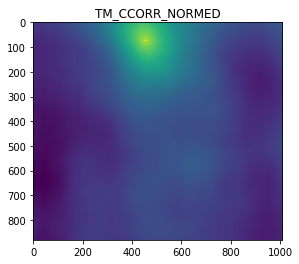

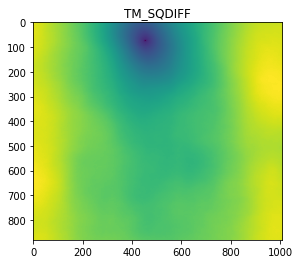

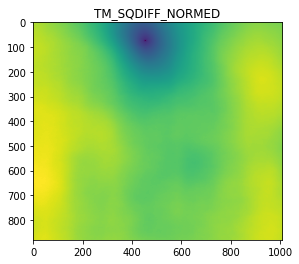

In [7]:
for m in methods:
    # Create a copy of the image.
    copy = full_image.copy()
    method = eval(m)
    # Use matchTemplate(img, part, method) to find the portion of the image where the part we're searching is found.
    res = cv2.matchTemplate(copy,part,method)
    plt.title(m.split('.')[1])
    plt.imshow(res)
    # We can see that 'cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED' perform the exact opposit of the other algos.
    # The part where the match occurs is found in the minimum.
    plt.show()

Method used: cv2.TM_CCOEFF


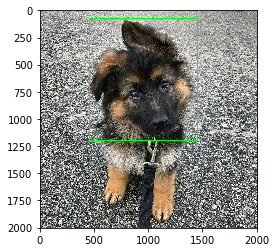

Method used: cv2.TM_CCOEFF_NORMED


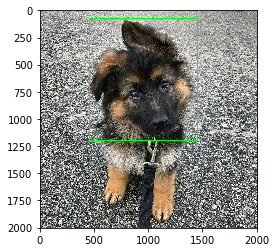

Method used: cv2.TM_CCORR


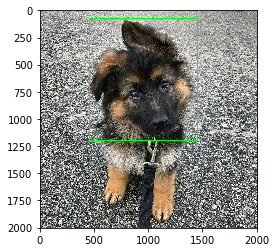

Method used: cv2.TM_CCORR_NORMED


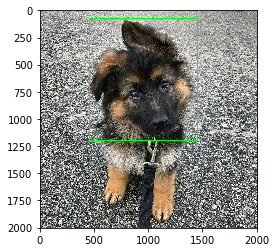

Method used: cv2.TM_SQDIFF


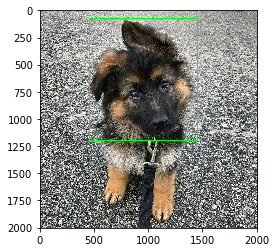

Method used: cv2.TM_SQDIFF_NORMED


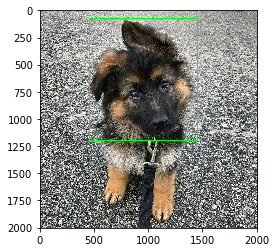

In [8]:
h, w, c = part.shape
for m in methods:
    copy = full_image.copy()
    method = eval(m)
    res = cv2.matchTemplate(copy,part,method)
    # we're interested only on the min and max locs
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(res)
    
    if m in ['cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']:
        top_left = minLoc
    else:
        top_left = maxLoc
    print(f'Method used: {m}')
    
    copy = cv2.rectangle(copy, top_left, (top_left[0]+w,top_left[1]+h), (0,255,0),10)
    plt.imshow(copy)
    plt.show()